**Introduction:** For our final metric we decided to choose the best neighborhood based on economic factors. We chose economic factors because the economic status of neighborhoods can tell you a lot about it. The more money a neighborhood has, the better it will probably be.

**The Metric:** The economic factors of a neighborhood could be many things that we didn't use but we broke it down into the economic features of employment or number of people making some wage, a combination of median household value and household sales, and median household income. This gives us a good scope of information to draw our conclusions on the best neighborhood. After applying the metric through the submetrics to all of the neighborhoods, the best one would be the one that preforms the best on all three.

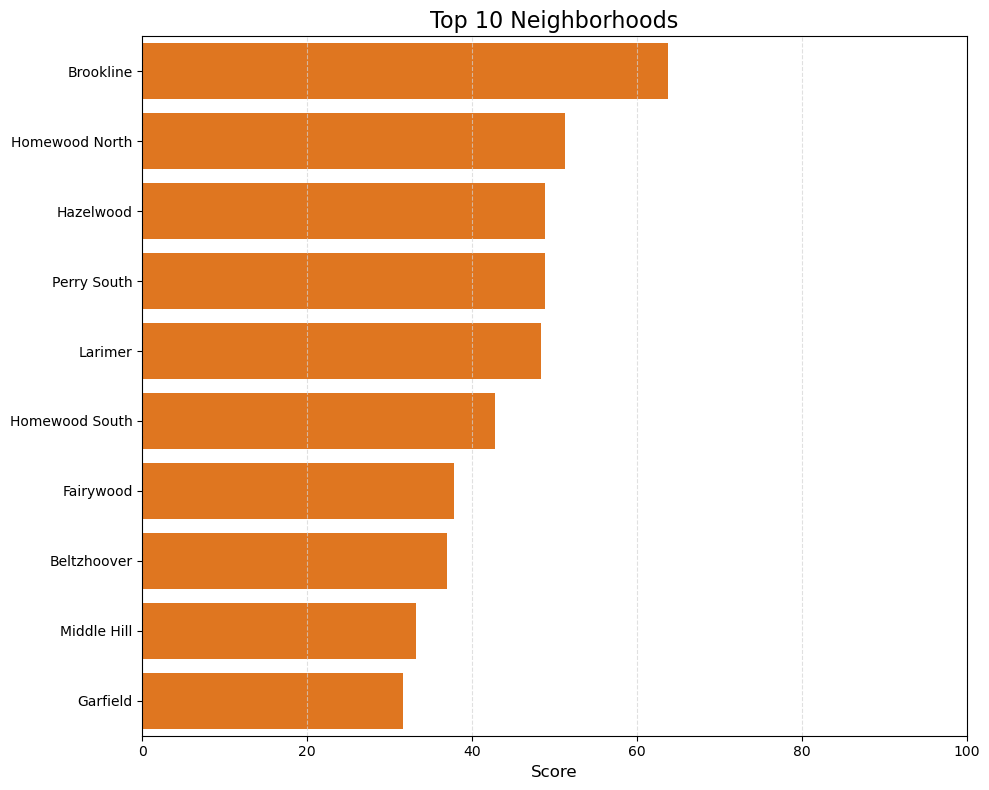

Top 10 Neighborhoods:
neighborhood_name  total_score  median_price  property_count
        Brookline    63.750000       17000.0              50
   Homewood North    51.233032        4000.0             397
        Hazelwood    48.823529        2500.0             427
      Perry South    48.785158        3034.0             407
          Larimer    48.376697        3000.0             404
   Homewood South    42.785701        3050.5             344
        Fairywood    37.794118       10000.0              37
      Beltzhoover    36.900452        2500.0             303
      Middle Hill    33.241810        3098.0             243
         Garfield    31.638824        2943.5             232


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica', 'Liberation Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('chart.csv')

neighborhood_stats = df.groupby('neighborhood_name').agg(
    property_count=('sale_price', 'count'),
    avg_price=('sale_price', 'mean'),
    median_price=('sale_price', 'median')
).reset_index()


valid_neighborhoods = neighborhood_stats[neighborhood_stats['property_count'] >= 10].copy()


# nomalize for the weight
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# nomalize
valid_neighborhoods['price_score'] = normalize(valid_neighborhoods['median_price'])
valid_neighborhoods['activity_score'] = normalize(valid_neighborhoods['property_count'])

# calculate weight 60% price+ 40% activity
valid_neighborhoods['total_score'] = (valid_neighborhoods['price_score'] * 0.6 + 
                                     valid_neighborhoods['activity_score'] * 0.4) * 100

valid_neighborhoods = valid_neighborhoods.sort_values('total_score', ascending=False)

top_10 = valid_neighborhoods.head(10)

#create chart
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=top_10,
    y='neighborhood_name',
    x='total_score',
    color='#ff7300', 
    orient='h'  
)

plt.title('Top 10 Neighborhoods', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('')

plt.xlim(0, 100)

plt.grid(axis='x', linestyle='--', alpha=0.7, color='lightgray')
plt.tight_layout()

plt.show()

# print top 10
print("Top 10 Neighborhoods:")
print(top_10[['neighborhood_name', 'total_score', 'median_price', 'property_count']].to_string(index=False))

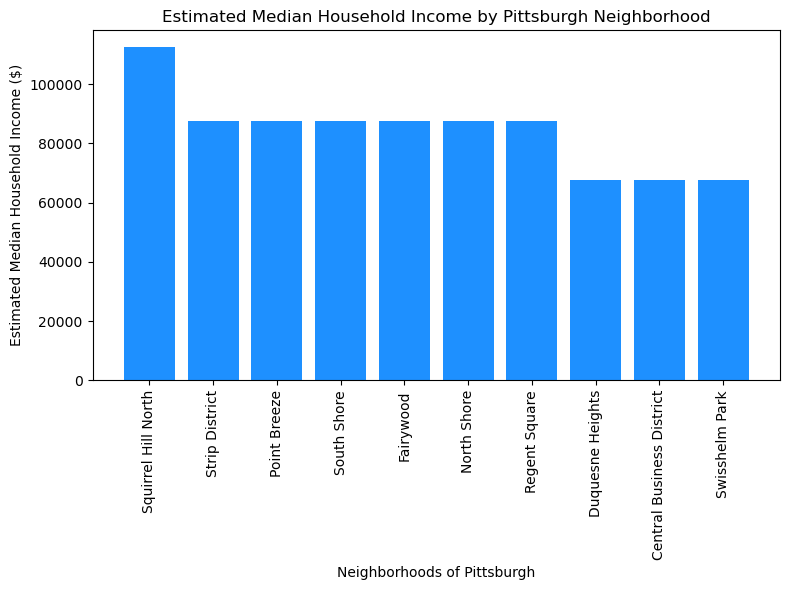

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('incomes.csv', sep=',')
#Constants for reading all the columns it needs, and median estimates for each of the income brackets
income_brackets = ['Less than $10,000','$10,000 to $14,999','$15,000 to $19,999','$20,000 to $24,999','$25,000 to $29,999','$30,000 to $34,999','$35,000 to $39,999','$40,000 to $44,999','$45,000 to $49,999','$50,000 to $59,999','$60,000 to $74,999','$75,000 to $99,999','$100,000 to $124,999','$125,000 to $149,999','$150,000 to $199,999','$200,000 or more']
bracket_medians = [5000,12500,17500,22500,27500,32500,37500,42500,47500,55000,67500,87500,112500,137500,175000,200000]

#Function to find the median estimate of a row in a dataset
def estimate_median(row):
    total = row['Total']
    remaining = total/2
    for i, bracket in enumerate(income_brackets):
        count = row[bracket]
        remaining = remaining - count
        if remaining<0:
            return bracket_medians[i]
        elif ((total==0) and (i+1<len(bracket_medians))):
            return ((bracket_medians[i]+bracket_medians[i+1])/2)

#Applying the method to incomes.csv to find the medians and sorting
df['Estimated Median Income'] = df.apply(estimate_median, axis=1)
df_sorted = df.sort_values('Estimated Median Income', ascending=False)
df_ten = df_sorted.head(10)

#Making the graph for the dataset
plt.figure(figsize=(8,6))
plt.bar(df_ten['Neighborhood'], df_ten['Estimated Median Income'], color='dodgerblue')
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods of Pittsburgh')
plt.ylabel('Estimated Median Household Income ($)')
plt.title('Estimated Median Household Income by Pittsburgh Neighborhood')
plt.tight_layout()
plt.show()

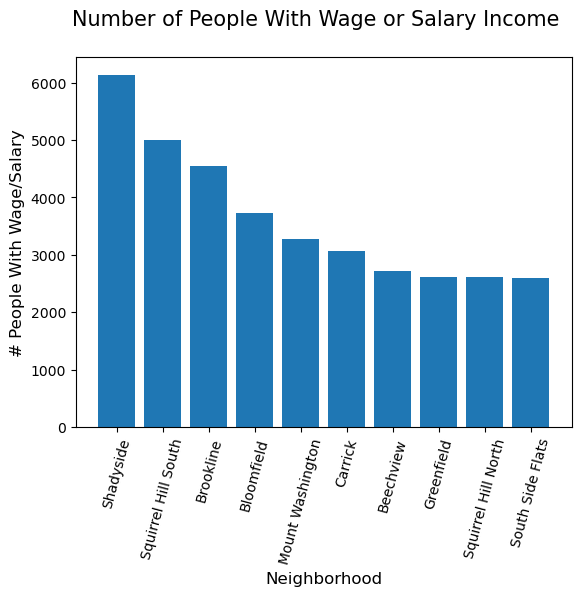

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv = pd.read_csv("Wage-Salary.csv")

tag = 'Estimate; Total: - With wage or salary income'
tag2 = 'Neighborhood'
final_df = csv.sort_values(by=tag, ascending=False)
neighborhoods = final_df[tag2].head(10)
people = final_df[tag].head(10)



plt.xlabel(tag2, fontsize=12)
plt.ylabel("# People With Wage/Salary", fontsize=12)
plt.suptitle("Number of People With Wage or Salary Income", fontsize=15)
plt.style.use("dark_background")
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=15)
plt.xticks(rotation = 75)
plt.bar(neighborhoods,people);

Summary:
The first analysis determined that Brookline was the best neighborhood in Pittsburgh based on home value and the number of property transactions.The second analysis performed was on the median income of each neighborhood, which concluded that Squirrel Hill North was the best in Pittsburgh. The third analyzed the number of people that are employed in each neighborhood, which showed that Shadyside was the best in Pittsburgh. However, those are just the top in each of those data points, in order to find the best overall neighborhood we need to look at which one has the highest rank between the three datasets. Based on each dataset, we believe it can be concluded that Brookline is the best overall neighborhood in Pittsburgh. Brookline has an overwhelming lead in home value as well as having the third highest rate of employment. But, Brookline does not appear in the top ten highest median household income, instead it appears tied in eighteenth place with some other neighborhoods. In conclusion, the best neighborhood in the City of Pittsburgh area is Brookline.

Conclusion:<br>
(Cole)- I agree with the best neighborhood being Brookline, just because after looking at Ruihans algorithm for finding the best neighborhood, and the weight system he came up with was very good. Even though my personal favorite from my submetric was Squirrel Hill North due to it's super high pay, I can agree the best was Brookline.<br>
(Ruihan)-Conclusion: Brooline is the best neighborhood according to my calculation. It gets 63.75. Although the property count is not big enough, its price is way higher that others. It can be noticed that Hazelwood has the cheapest price among the 10, and it has the most property count among the 10.<br>
(Jacob)-Based on the data in my dataset, it looks like Shadyside has the most people with wages or salaries in the Pittsburgh area. There are over six thousand people with wages or salaries in Shadyside, which is around one thousand more than second place. Although there are a few weak points in this dataset, for example the data was recorded in 2015 so it might be slightly outdated. Aside from that, a neighborhood with plenty of economy is not only prosperous to work in but also to live in. Therefore, I can conclude that Shadyside is the best neighborhood in Pittsburgh.